### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r'/content/drive/MyDrive/Skin-Cancer-Project/Train')
data_dir_test = pathlib.Path(r'/content/drive/MyDrive/Skin-Cancer-Project/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

1525
12


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1525 files belonging to 9 classes.
Using 1220 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1525 files belonging to 9 classes.
Using 305 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

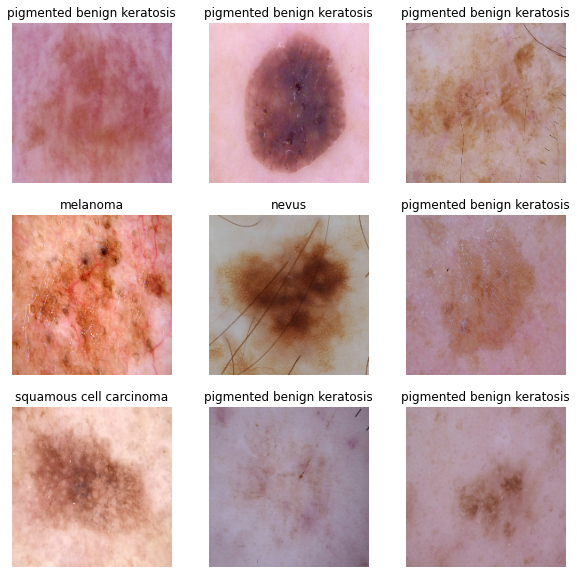

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
39/39 [==============================] - 406s 3s/step - loss: 1.8455 - accuracy: 0.3270 - val_loss: 1.8255 - val_accuracy: 0.2918
Epoch 2/20
39/39 [==============================] - 1s 23ms/step - loss: 1.5040 - accuracy: 0.4205 - val_loss: 1.4056 - val_accuracy: 0.4852
Epoch 3/20
39/39 [==============================] - 1s 23ms/step - loss: 1.3054 - accuracy: 0.5041 - val_loss: 1.7550 - val_accuracy: 0.3934
Epoch 4/20
39/39 [==============================] - 1s 23ms/step - loss: 1.2594 - accuracy: 0.5262 - val_loss: 1.4195 - val_accuracy: 0.4295
Epoch 5/20
39/39 [==============================] - 1s 23ms/step - loss: 1.1943 - accuracy: 0.5533 - val_loss: 1.3169 - val_accuracy: 0.5148
Epoch 6/20
39/39 [==============================] - 1s 23ms/step - loss: 1.0749 - accuracy: 0.5934 - val_loss: 1.2571 - val_accuracy: 0.5443
Epoch 7/20
39/39 [==============================] - 1s 23ms/step - loss: 1.0123 - accuracy: 0.6123 - val_loss: 1.2926 - val_accuracy: 0.5180
Epoch 8/20
39

### Visualizing training results

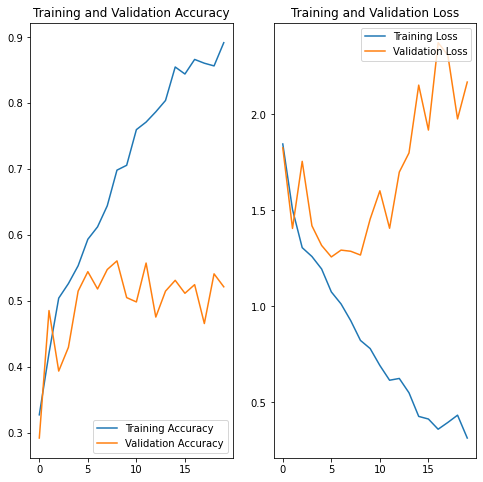

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

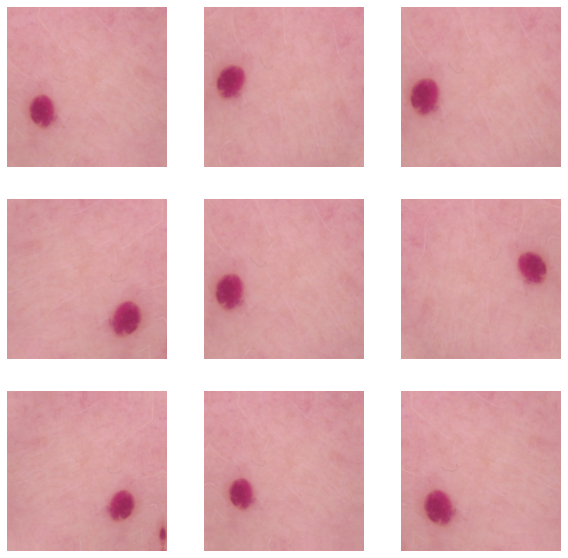

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
39/39 [==============================] - 2s 30ms/step - loss: 1.9756 - accuracy: 0.3033 - val_loss: 1.7541 - val_accuracy: 0.3934
Epoch 2/20
39/39 [==============================] - 1s 26ms/step - loss: 1.6832 - accuracy: 0.3820 - val_loss: 1.4735 - val_accuracy: 0.4656
Epoch 3/20
39/39 [==============================] - 1s 26ms/step - loss: 1.4072 - accuracy: 0.4598 - val_loss: 1.3885 - val_accuracy: 0.4754
Epoch 4/20
39/39 [==============================] - 1s 26ms/step - loss: 1.2608 - accuracy: 0.5180 - val_loss: 1.3234 - val_accuracy: 0.4852
Epoch 5/20
39/39 [==============================] - 1s 26ms/step - loss: 1.2475 - accuracy: 0.5221 - val_loss: 1.5806 - val_accuracy: 0.4426
Epoch 6/20
39/39 [==============================] - 1s 26ms/step - loss: 1.2548 - accuracy: 0.5221 - val_loss: 1.4376 - val_accuracy: 0.4492
Epoch 7/20
39/39 [==============================] - 1s 26ms/step - loss: 1.2053 - accuracy: 0.5279 - val_loss: 1.3352 - val_accuracy: 0.4918
Epoch 8/20
39

### Visualizing the results

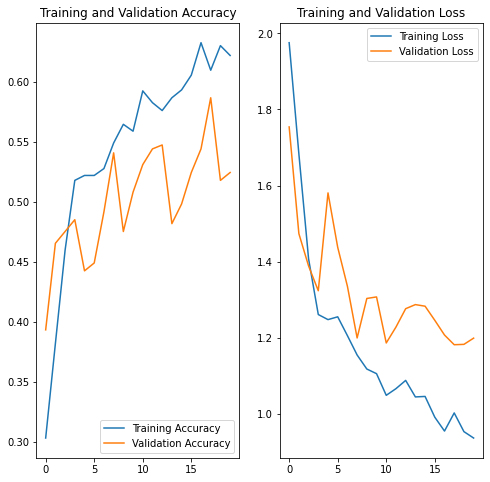

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

1525

In [23]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,vascular lesion
1,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,vascular lesion
2,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,vascular lesion
3,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,vascular lesion
4,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,vascular lesion
...,...,...
1520,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,nevus
1521,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,nevus
1522,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,nevus
1523,/content/drive/MyDrive/Skin-Cancer-Project/Tra...,nevus


Class=6, n=139 (9.115%)
Class=4, n=77 (5.049%)
Class=5, n=181 (11.869%)
Class=3, n=462 (30.295%)
Class=0, n=114 (7.475%)
Class=1, n=195 (12.787%)
Class=2, n=357 (23.410%)


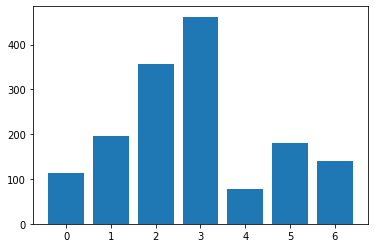

In [24]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [25]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset="/content/drive/MyDrive/Skin-Cancer-Project/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17DDD86B50>: 100%|██████████| 500/500 [00:49<00:00, 10.07 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17FA406950>: 100%|██████████| 500/500 [00:57<00:00,  8.68 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17E406AF10>: 100%|██████████| 500/500 [00:42<00:00, 11.86 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17DDD96650>: 100%|██████████| 500/500 [00:54<00:00,  9.18 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F17DFF8D850>: 100%|██████████| 500/500 [00:58<00:00,  8.48 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F17DFFF8E90>: 100%|██████████| 500/500 [00:47<00:00, 10.61 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17E40F2A90>: 100%|██████████| 500/500 [00:45<00:00, 11.00 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F17DDE5D990>: 100%|██████████| 500/500 [00:52<00:00,  9.61 Samples/s]


Initialised with 1525 image(s) found.
Output directory set to /content/drive/MyDrive/Skin-Cancer-Project/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F17E4208A50>: 100%|██████████| 500/500 [00:51<00:00,  9.70 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

0


### Lets see the distribution of augmented data after adding new images to the original training data.

In [29]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

[]

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

[]

In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    462
nevus                         357
melanoma                      195
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
seborrheic keratosis           77
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6025 files belonging to 10 classes.
Using 4820 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6025 files belonging to 10 classes.
Using 1205 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [39]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
151/151 [==============================] - 39s 58ms/step - loss: nan - accuracy: 0.0176 - val_loss: nan - val_accuracy: 0.0249
Epoch 2/20
151/151 [==============================] - 3s 23ms/step - loss: nan - accuracy: 0.0174 - val_loss: nan - val_accuracy: 0.0249
Epoch 3/20
151/151 [==============================] - 3s 23ms/step - loss: nan - accuracy: 0.0174 - val_loss: nan - val_accuracy: 0.0249
Epoch 4/20
151/151 [==============================] - 3s 23ms/step - loss: nan - accuracy: 0.0174 - val_loss: nan - val_accuracy: 0.0249
Epoch 5/20
151/151 [==============================] - 3s 22ms/step - loss: nan - accuracy: 0.0174 - val_loss: nan - val_accuracy: 0.0249
Epoch 6/20
151/151 [==============================] - 3s 23ms/step - loss: nan - accuracy: 0.0174 - val_loss: nan - val_accuracy: 0.0249
Epoch 7/20
151/151 [==============================] - 4s 27ms/step - loss: nan - accuracy: 0.0174 - val_loss: nan - val_accuracy: 0.0249
Epoch 8/20
151/151 [====================

#### **Todo:**  Visualize the model results

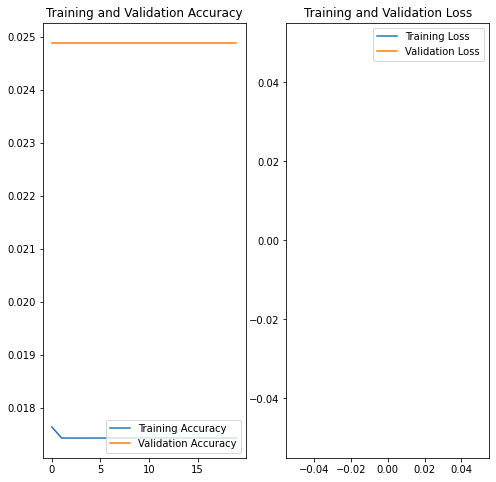

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

